`**TA-Lib to add technical analysis to your own financial market trading applications**

In [19]:
url = 'https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files'
!wget $url/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget $url/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib

(Reading database ... 121778 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) over (0.4.0-oneiric1) ...
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) over (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.10.2-1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.4) ...
/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc_proxy.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_0.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbb.so.12 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_5.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc.so.2 is not a symbolic link



In [20]:
import talib
import yfinance as yf
import matplotlib.pyplot as plt

In [21]:
from datetime import datetime, timedelta

In [22]:
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')

stock_data = yf.download("AAPL", start=start_date_str, end=end_date_str)


[*********************100%%**********************]  1 of 1 completed


**Daily Closing Price**

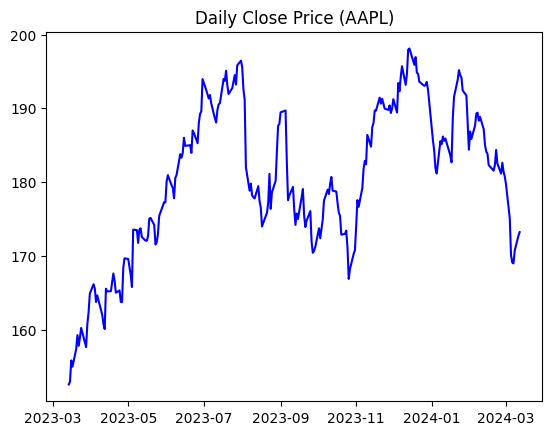

In [23]:
plt.plot(stock_data['Close'], color='blue')
plt.title("Daily Close Price (AAPL)")
plt.show()

**SMA -> Simple Moving Average**

In [24]:
stock_data['SMA_20'] = talib.SMA(stock_data['Close'], timeperiod=20)
stock_data['SMA_50'] = talib.SMA(stock_data['Close'], timeperiod=50)

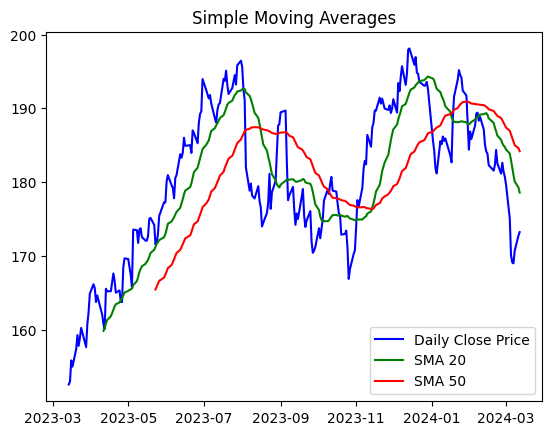

In [25]:
plt.plot(stock_data['Close'], color='blue', label='Daily Close Price')
plt.plot(stock_data['SMA_20'], color='green', label='SMA 20')
plt.plot(stock_data['SMA_50'], color='red', label='SMA 50')
plt.legend()
plt.title('Simple Moving Averages')
plt.show()

**EMA -> Exponential Moving Average**

In [26]:
stock_data['EMA_20'] = talib.EMA(stock_data['Close'], timeperiod=20)
stock_data['EMA_50'] = talib.EMA(stock_data['Close'], timeperiod=50)

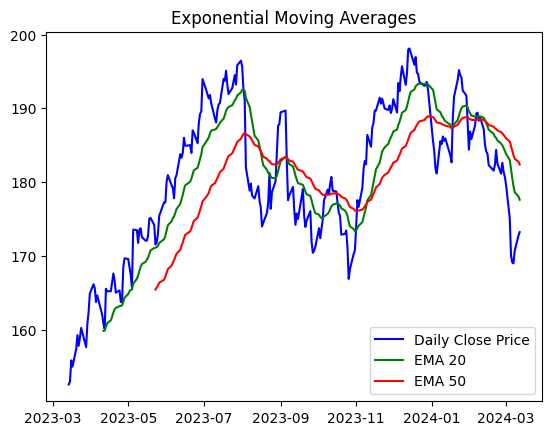

In [27]:
plt.plot(stock_data['Close'], color='blue', label='Daily Close Price')
plt.plot(stock_data['EMA_20'], color='green', label='EMA 20')
plt.plot(stock_data['EMA_50'], color='red', label='EMA 50')
plt.legend()
plt.title('Exponential Moving Averages')
plt.show()

**SMA 50 vs EMA 50**

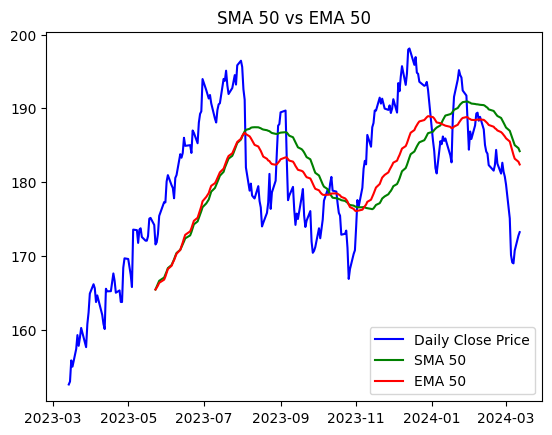

In [28]:
plt.plot(stock_data['Close'], color='blue', label='Daily Close Price')
plt.plot(stock_data['SMA_50'], color='green', label='SMA 50')
plt.plot(stock_data['EMA_50'], color='red', label='EMA 50')
plt.legend()
plt.title('SMA 50 vs EMA 50')
plt.show()

**MACD -> Moving Average convergence/divergence**

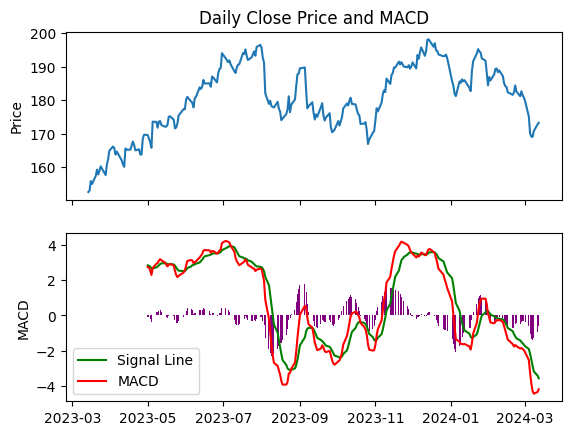

In [30]:
macd, macdsignal, macdhist = talib.MACD(stock_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.set_ylabel('Price')
ax1.plot(stock_data['Close'])
ax2.set_ylabel('MACD')
ax2.plot(macdsignal, color='green', label='Signal Line')
ax2.plot(macd, color='red', label='MACD')
ax2.bar(macdhist.index, macdhist, color='purple')
ax1.set_title('Daily Close Price and MACD')
plt.legend()
plt.show()

**RSI -> Relative Strength Index**

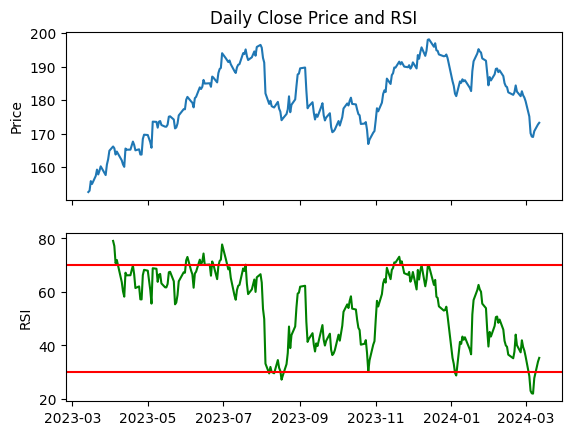

In [31]:
stock_data['RSI'] = talib.RSI(stock_data['Close'], timeperiod=14)
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.set_ylabel('Price')
ax1.plot(stock_data['Close'])
ax2.set_ylabel('RSI')
ax2.plot(stock_data['RSI'], color='green')
ax2.axhline(y = 70, color = 'r', linestyle = '-')
ax2.axhline(y = 30, color = 'r', linestyle = '-')
ax1.set_title('Daily Close Price and RSI')
plt.show()

**Bollinger Bands**

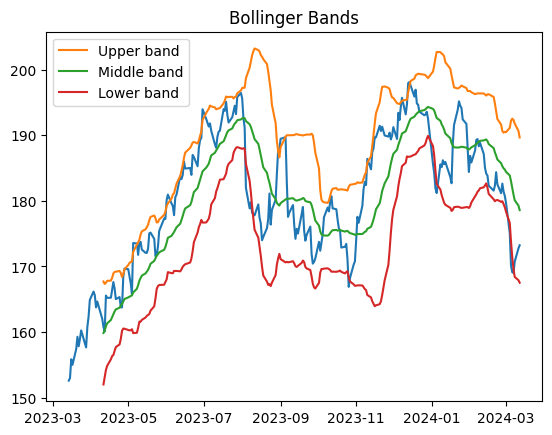

In [32]:
upper, mid, lower = talib.BBANDS(stock_data['Close'], nbdevup=2, nbdevdn=2, timeperiod=20)
plt.plot(stock_data['Close'])
plt.plot(upper, label="Upper band")
plt.plot(mid, label='Middle band')
plt.plot(lower, label='Lower band')
plt.title('Bollinger Bands')
plt.legend()
plt.show()